# Overview

This side project I created specifically to learn the basics of Natural Language Processing (NLP). As the first step, I import all required packages which are NLTK to do all NLP tasks, Pandas for data manipulation, and Plotnine for data visualization.

In [1]:
import nltk
import pandas as pd
from plotnine import * 

c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


After importing NLTK packages, we also need to run nltk.download() function to download all kinds of corpuses and functions to the local computer

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Dataset

For this project I only use one dataset which is the collection of SMS labeled messages (ham or spam). You can download the dataset here: https://www.kaggle.com/patil4444/filtering-mobile-phone-spam

In [3]:
df = pd.read_csv("sms_spam.csv") 

df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


# Exploratory data analysis

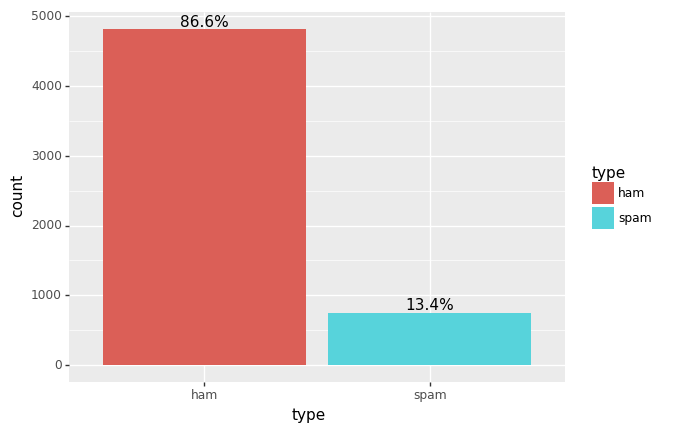

<ggplot: (120022986963)>

In [4]:
#Check the distribution of both classes
(ggplot(df, aes('type', fill='type'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

# Data preparation

### Removing punctuation

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['text_clean'] = df['text'].apply(lambda x: remove_punct(x))

df.head()

,type,text,text_clean
0,ham,Hope you are having a good week. Just checking in,Hope you are having a good week Just checking in
1,ham,K..give back my thanks.,Kgive back my thanks
2,ham,Am also doing in cbe only. But have to pay.,Am also doing in cbe only But have to pay
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 STAR Ibiza Holiday or £10000 c...
4,spam,okmail: Dear Dave this is your final notice to...,okmail Dear Dave this is your final notice to ...


### Tokenization 

In [7]:
import re

In [8]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['text_tokenized'] = df['text_clean'].apply(lambda x: tokenize(x.lower()))

df.head()

,type,text,text_clean,text_tokenized
0,ham,Hope you are having a good week. Just checking in,Hope you are having a good week Just checking in,"[hope, you, are, having, a, good, week, just, ..."
1,ham,K..give back my thanks.,Kgive back my thanks,"[kgive, back, my, thanks]"
2,ham,Am also doing in cbe only. But have to pay.,Am also doing in cbe only But have to pay,"[am, also, doing, in, cbe, only, but, have, to..."
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 STAR Ibiza Holiday or £10000 c...,"[complimentary, 4, star, ibiza, holiday, or, 1..."
4,spam,okmail: Dear Dave this is your final notice to...,okmail Dear Dave this is your final notice to ...,"[okmail, dear, dave, this, is, your, final, no..."


### Removing stopwords

In [9]:
stopword = nltk.corpus.stopwords.words('english')

In [10]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['text_without_stopwords'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,type,text,text_clean,text_tokenized,text_without_stopwords
0,ham,Hope you are having a good week. Just checking in,Hope you are having a good week Just checking in,"[hope, you, are, having, a, good, week, just, ...","[hope, good, week, checking]"
1,ham,K..give back my thanks.,Kgive back my thanks,"[kgive, back, my, thanks]","[kgive, back, thanks]"
2,ham,Am also doing in cbe only. But have to pay.,Am also doing in cbe only But have to pay,"[am, also, doing, in, cbe, only, but, have, to...","[also, cbe, pay]"
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 STAR Ibiza Holiday or £10000 c...,"[complimentary, 4, star, ibiza, holiday, or, 1...","[complimentary, 4, star, ibiza, holiday, 10000..."
4,spam,okmail: Dear Dave this is your final notice to...,okmail Dear Dave this is your final notice to ...,"[okmail, dear, dave, this, is, your, final, no...","[okmail, dear, dave, final, notice, collect, 4..."


### Reducing the inflectional forms of each word

There are two different techniques to reach this goal: stemming and lemmatization. Stemming is a technique that chops off the end of words in (ex: argue, argued, argues, arguing, and argus to argu) while lemmatization use a vocabulary and morphological analysis of words to convert the word beck to its normal form (ex: geese to goose).

#### Stemming 

In [11]:
ps = nltk.PorterStemmer()

In [12]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['text_stemmed'] = df['text_without_stopwords'].apply(lambda x: stemming(x))

df.head()

,type,text,text_clean,text_tokenized,text_without_stopwords,text_stemmed
0,ham,Hope you are having a good week. Just checking in,Hope you are having a good week Just checking in,"[hope, you, are, having, a, good, week, just, ...","[hope, good, week, checking]","[hope, good, week, check]"
1,ham,K..give back my thanks.,Kgive back my thanks,"[kgive, back, my, thanks]","[kgive, back, thanks]","[kgive, back, thank]"
2,ham,Am also doing in cbe only. But have to pay.,Am also doing in cbe only But have to pay,"[am, also, doing, in, cbe, only, but, have, to...","[also, cbe, pay]","[also, cbe, pay]"
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 STAR Ibiza Holiday or £10000 c...,"[complimentary, 4, star, ibiza, holiday, or, 1...","[complimentary, 4, star, ibiza, holiday, 10000...","[complimentari, 4, star, ibiza, holiday, 10000..."
4,spam,okmail: Dear Dave this is your final notice to...,okmail Dear Dave this is your final notice to ...,"[okmail, dear, dave, this, is, your, final, no...","[okmail, dear, dave, final, notice, collect, 4...","[okmail, dear, dave, final, notic, collect, 4,..."


In [13]:
wn = nltk.WordNetLemmatizer()

#### Lemmatizing 

In [14]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['text_lemmatized'] = df['text_without_stopwords'].apply(lambda x: lemmatizing(x))

df.head(10)

,type,text,text_clean,text_tokenized,text_without_stopwords,text_stemmed,text_lemmatized
0,ham,Hope you are having a good week. Just checking in,Hope you are having a good week Just checking in,"[hope, you, are, having, a, good, week, just, ...","[hope, good, week, checking]","[hope, good, week, check]","[hope, good, week, checking]"
1,ham,K..give back my thanks.,Kgive back my thanks,"[kgive, back, my, thanks]","[kgive, back, thanks]","[kgive, back, thank]","[kgive, back, thanks]"
2,ham,Am also doing in cbe only. But have to pay.,Am also doing in cbe only But have to pay,"[am, also, doing, in, cbe, only, but, have, to...","[also, cbe, pay]","[also, cbe, pay]","[also, cbe, pay]"
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 STAR Ibiza Holiday or £10000 c...,"[complimentary, 4, star, ibiza, holiday, or, 1...","[complimentary, 4, star, ibiza, holiday, 10000...","[complimentari, 4, star, ibiza, holiday, 10000...","[complimentary, 4, star, ibiza, holiday, 10000..."
4,spam,okmail: Dear Dave this is your final notice to...,okmail Dear Dave this is your final notice to ...,"[okmail, dear, dave, this, is, your, final, no...","[okmail, dear, dave, final, notice, collect, 4...","[okmail, dear, dave, final, notic, collect, 4,...","[okmail, dear, dave, final, notice, collect, 4..."
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,Aiya we discuss later lar Pick u up at 4 is it,"[aiya, we, discuss, later, lar, pick, u, up, a...","[aiya, discuss, later, lar, pick, u, 4]","[aiya, discuss, later, lar, pick, u, 4]","[aiya, discus, later, lar, pick, u, 4]"
6,ham,Are you this much buzy,Are you this much buzy,"[are, you, this, much, buzy]","[much, buzy]","[much, buzi]","[much, buzy]"
7,ham,Please ask mummy to call father,Please ask mummy to call father,"[please, ask, mummy, to, call, father]","[please, ask, mummy, call, father]","[pleas, ask, mummi, call, father]","[please, ask, mummy, call, father]"
8,spam,Marvel Mobile Play the official Ultimate Spide...,Marvel Mobile Play the official Ultimate Spide...,"[marvel, mobile, play, the, official, ultimate...","[marvel, mobile, play, official, ultimate, spi...","[marvel, mobil, play, offici, ultim, spiderman...","[marvel, mobile, play, official, ultimate, spi..."
9,ham,"fyi I'm at usf now, swing by the room whenever",fyi Im at usf now swing by the room whenever,"[fyi, im, at, usf, now, swing, by, the, room, ...","[fyi, im, usf, swing, room, whenever]","[fyi, im, usf, swing, room, whenev]","[fyi, im, usf, swing, room, whenever]"
